# <h1 style="color:blueblack; text-align:center;font-size:3rem">DATA ASSIMILATION METHOD FOR TEMPERATURE DATA &#128293; &#129298;  </h1>

### IMPORTATION OF LIBRARIES

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Define the data
observations = np.array([15.2, 16.1, 14.5, 15.8, 25.0])
model_output = np.array([14.8, 15.5, 14.0, 16.0, 25.3])


### INTERPOLATION METHOD

In [3]:

# Optimal Interpolation
weight_obs = 0.5
weight_model = 0.5
analysis_fields_oi = weight_obs * observations + weight_model * model_output


### KALMAN FILTERING

In [4]:



# Kalman Filter
n = len(observations)
x = model_output[0]  # initial state estimate
P = 1.0  # initial estimate error covariance
Q = 1.0  # process noise covariance
R = 1.0  # measurement noise covariance

analysis_fields_kf = np.zeros(n)
for i in range(n):
    # Prediction step
    x_prior = x
    P_prior = P + Q

    # Update step
    K = P_prior / (P_prior + R)  # Kalman gain
    x = x_prior + K * (observations[i] - x_prior)
    P = (1 - K) * P_prior

    # Store the result
    analysis_fields_kf[i] = x


### BIASES

In [5]:

# Calculate RMSE
def calculate_rmse(true_values, predicted_values):
    return np.sqrt(np.mean((true_values - predicted_values) ** 2))

# Calculate Bias
def calculate_bias(true_values, predicted_values):
    return np.mean(predicted_values - true_values)

rmse_model = calculate_rmse(observations, model_output)
rmse_oi = calculate_rmse(observations, analysis_fields_oi)
rmse_kf = calculate_rmse(observations, analysis_fields_kf)

bias_model = calculate_bias(observations, model_output)
bias_oi = calculate_bias(observations, analysis_fields_oi)
bias_kf = calculate_bias(observations, analysis_fields_kf)




### OUTPUT 

In [6]:

# Print the results
print(f"RMSE of Model: {rmse_model:.2f}")
print(f"RMSE of Optimal Interpolation: {rmse_oi:.2f}")
print(f"RMSE of Kalman Filter: {rmse_kf:.2f}")
print(f"Bias of Model: {bias_model:.2f}")
print(f"Bias of Optimal Interpolation: {bias_oi:.2f}")
print(f"Bias of Kalman Filter: {bias_kf:.2f}")

RMSE of Model: 0.42
RMSE of Optimal Interpolation: 0.21
RMSE of Kalman Filter: 1.66
Bias of Model: -0.20
Bias of Optimal Interpolation: -0.10
Bias of Kalman Filter: -0.80


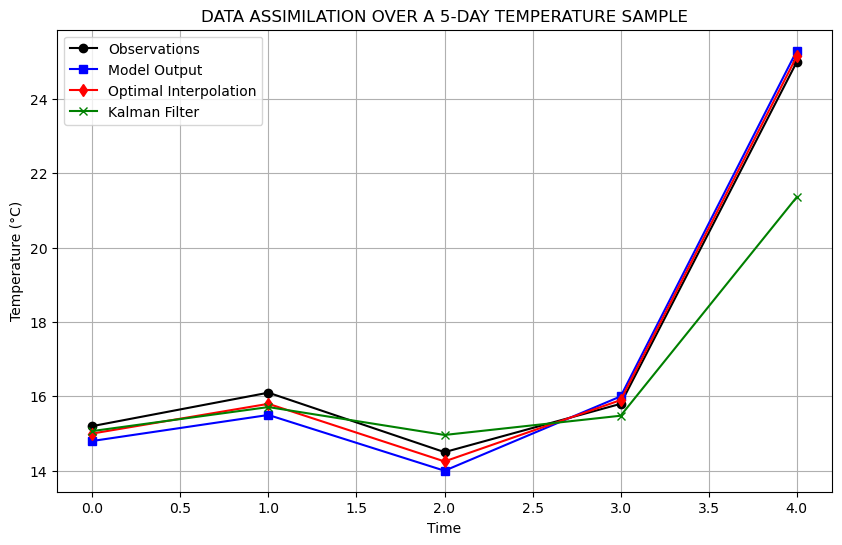

In [7]:
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(observations, 'o-', label='Observations', color='black')
plt.plot(model_output, 's-', label='Model Output', color='blue')
plt.plot(analysis_fields_oi, 'd-', label='Optimal Interpolation', color='red')
plt.plot(analysis_fields_kf, 'x-', label='Kalman Filter', color='green')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('DATA ASSIMILATION OVER A 5-DAY TEMPERATURE SAMPLE')
plt.legend()
plt.grid(True)
plt.show()

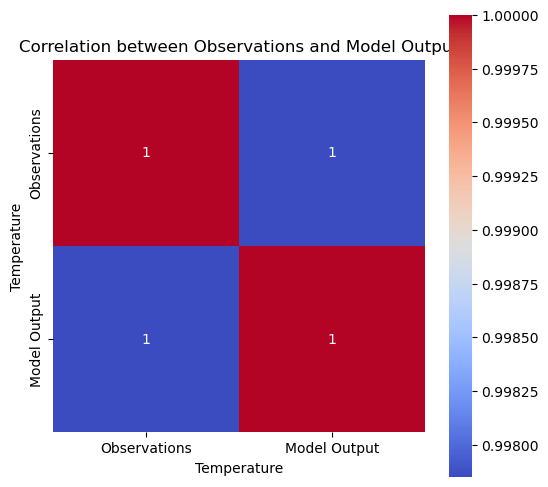

In [9]:



observations = np.array([15.2, 16.1, 14.5, 15.8, 25.0])
model_output = np.array([14.8, 15.5, 14.0, 16.0, 25.3])

data = pd.DataFrame({'Observations': observations, 'Model Output': model_output})

# Calculate the correlation
correlation = data.corr()

# Generate the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)

plt.title('Correlation between Observations and Model Output')
plt.xlabel('Temperature')
plt.ylabel('Temperature')
plt.show()

The value 1 obtained shows a perfect positive correlation between the observed and the model value,and its strong and linear

# <h1 style="color:black; text-align:center;font-size:3rem">END OF CODE  || @DREW &#9997;</h1>